# 缩写
- ISP  -- Internet service provider         互联网服务提供者
- IXP  -- Internet exchange point           互联网交换点
- RFC  -- Request for Comments              征求意见
- IETF -- Internet Engineering Task Force   互联网工程特别工作组        
- DSL  -- Digital subscriber line           数字订购线路
- HTTP -- hypertext transfer protocol       超文本传输协议
- RDT  -- Reliable data transfer protocol   可靠的数据传输协议

# Circuit-switching
- 电路交换：在传统的电话网络中使用的一种替代方法，在设计互联网的过程中被考虑。
- 分配给终端的资源，保留给来源和目的地之间的 "呼叫"。
- 专用资源：不共享
- 类似电路的（保证）性能
- 如果不被呼叫使用，电路段闲置（不共享）。
- 常用于传统电话网络
- 来回的路径一样
- 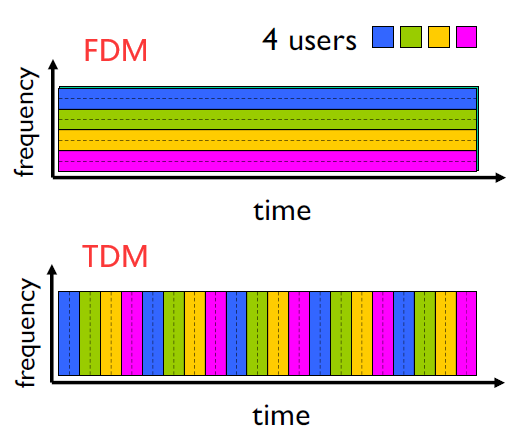
- **Frequency Division Multiplexing (FDM) 频分复用**
  - 光，电磁频率被分为（窄）频段
  - 每个呼叫分配自己的频段，可以以该窄带的最大速率传输
- **Time Division Multiplexing (TDM) 时分复用**
  - 时间被划分为槽点
  - 每个呼叫被分配到周期性时隙，可以以（较宽）频段的最大速率传输，但只在其时隙内传输
- 为什么电路转换不可行？
    - 效率低下
      - 计算机通信往往是非常突发性的。例如，浏览一连串的网页
      - 专门的电路不能在沉默期使用或共享
      - 不能适应网络的动态变化
    - 固定的数据速率
      - 计算机以非常不同的速率进行通信。例如，观看视频与使用telnet或网页浏览的对比
      - 固定的数据速率是没有用的
    - 连接状态维护
      - 需要维护每个通信状态，这是一个相当大的开销。
      - 不具有可扩展性

# Packet-switching
- 分组交换：主机将应用层信息分解成数据包
- 从一个路由器转发数据包到下一个路由器，跨越从源头到目的地的路径上的链接
- 每个数据包以全链路容量传输
- 数据以格式化的比特块（Packets）的形式发送
- 数据包由 header 和 payload 组成
- Switches “forward” packets based on their headers
- 每个数据包都是独立传输的
- 可能出现过度拥堵：缓冲区溢出导致的数据包延迟和丢失
- 资源共享
- 更简单，没有呼叫设置
- 适合 "突发 "数据 - 有时有数据要发送，但有时没有
- 分组交换允许更多的用户使用网络
- resources are allocated on demand

In [5]:
# Packet vs Circuit switching

from math import comb
from functools import reduce

link = 1000         # kb/s
each_user = 100     # kb/s when user is active
active_rate = 0.1   # 10% of the time
num_user = 35       # Number of trials
num_succ = 10       # Number of successes (x)

def prob(n, k, p):
    # n is the number of trials, k is the number of successes, p is the probability of success
    return comb(n, k) * p**k * (1-p)**(n-k)

print(f"Circuit-switching:\n\tcan support {link/each_user} users")
print("Packet-switching:")
print(f"\twith {num_user} users, probability = {num_succ} user active at same time is {prob(num_user, num_succ, active_rate):.10f}")
print(f"\twith {num_user} users, probability > {num_succ} user active at same time is less than {1 - sum((prob(num_user, i, active_rate) for i in range(num_succ+1))):.10f}")
print(f"\twith {num_user} users, probability < {num_succ} user active at same time is less than {sum((prob(num_user, i, active_rate) for i in range(num_succ))):.10f}")
print(f"\twith {num_user} users, probability >= {num_succ} user active at same time is less than {1-sum((prob(num_user, i, active_rate) for i in range(num_succ))):.10f}")
print(f"\twith {num_user} users, probability <= {num_succ} user active at same time is less than {sum((prob(num_user, i, active_rate) for i in range(num_succ+1))):.10f}")

Circuit-switching:
	can support 2.0 users
Packet-switching:
	with 3 users, probability = 3 user active at same time is 0.0080000000
	with 3 users, probability > 3 user active at same time is less than -0.0000000000
	with 3 users, probability < 3 user active at same time is less than 0.9920000000
	with 3 users, probability >= 3 user active at same time is less than 0.0080000000
	with 3 users, probability <= 3 user active at same time is less than 1.0000000000


# Delay

End-to-end delay = sum of all nodal along the path

Total delay        = nodal processing + queueing delay + transmission delay + propagation delay
nodal processing   = check bit errors, determine output link, typically < msec
queueing delay     = time waiting at output link for transmission, depends on congestion level of router
transmission delay = packet length (bits) / link transmission rate (bps)
propagation delay  = length of physical link / propagation speed (~2x108 m/sec)

总延迟  = 节点处理+排队延迟+传输延迟+传播延迟
节点处理 = 检查比特错误，确定输出链路，通常<毫秒
排队延时 = 在输出链路上等待传输的时间，取决于路由器的拥堵程度
传播延迟 = 数据包长度（比特）/链路传输率（bps）。
传播延迟 = 物理链路的长度/传播速度（~2x108米/秒）


Queueing delay
Packet arrival rate = a packets/sec
Packet length = L bits
Link bandwidth = R bits/sec

La/R ~ 0: avg. queueing delay small
La/R -> 1: delays become large
La/R > 1: more “work” than can be serviced, average delay infinite! (this is when a is random!)

- 这很简单
  - La是有多少比特进入 ->
  - R是有多少比特离开  <-
  - 取二者之间的比率
  - 如果 <1，则La小于R--即比特离开的速度比进来的快
  - 如果 =1，位以相同的速度离开，他们进入的速度也相同
  - 如果 >1，它们会累积起来，然后数据包开始被丢弃


In [10]:
# Calculate the end-to-end delay

packets_length = 10000              # bits
link_between = 5000                 # m
num_routers = 4                     # between source and destination
processing_time = 10                # msec
transmission_rate = 10**6           # bit/s
propagation_speed = 2.5 * 10**8     # m/s
queue_delay = 0

print("hop_delay = proc + trans + prop + queue")
print(f"{processing_time} msec + {(link_between/propagation_speed) * 1000} msec + {(packets_length/transmission_rate) * 1000} msec + {queue_delay} msec")
hop_delay = processing_time + ((link_between/propagation_speed) * 1000) + (packets_length/transmission_rate) * 1000 + queue_delay
print(f"hop_delay = {hop_delay}ms\n")

print("total_delay = hop_delay * num_routers+1")
print(f"{hop_delay} msec * {num_routers+1}")
print(f"total_delay = {hop_delay * (num_routers+1)} msec")


hop_delay = proc + trans + prop + queue
10 msec + 0.02 msec + 10.0 msec + 0 msec
hop_delay = 20.02ms

total_delay = hop_delay * num_routers+1
20.02 msec * 5
total_delay = 100.1 msec


# Packet loss
- 队列（又称缓冲区）在缓冲区内的链接的容量是有限的
- 到达满队的数据包被丢弃（又称丢失）。
- 丢失的数据包可能被前一个节点、源端系统重传，或者根本不重传

# Throughput
- 吞吐量：比特从发送方发送到接收方的速率（比特/时间单位）。
- bottleneck link: 限制端部吞吐量的端部路径上的链接

## Internet protocol stack

# Application
- FTP, SMTP, IMAP, HTTP, Skype, DNS

# Transport
- TCP，UDP

# Network
- IP，routing protocols

# Link
- Ethernet、802.11（WiFi）、PPP

# Physical
- bits “on the wire”

**Each layer**
  - Depends on layer below 
  - Supports layer above 
  - Independent of others 

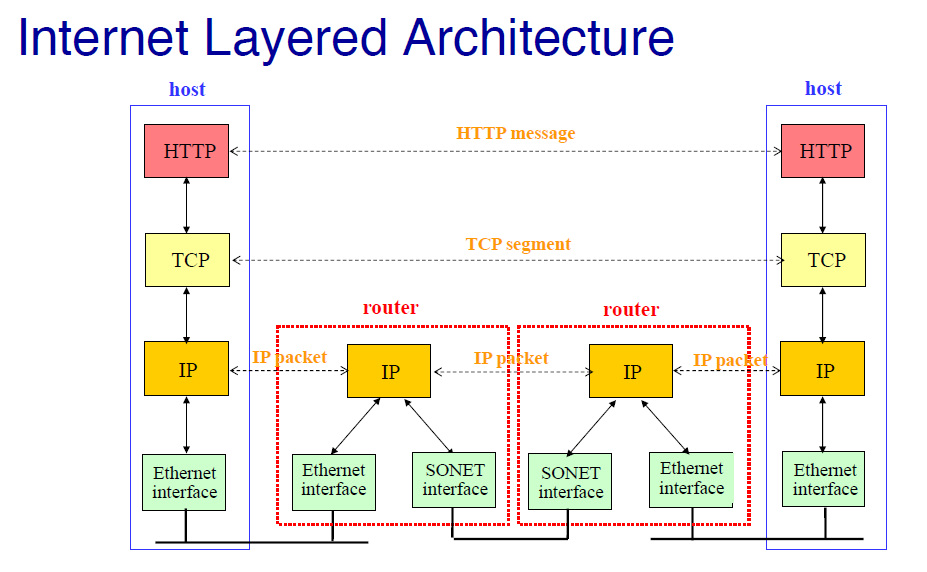
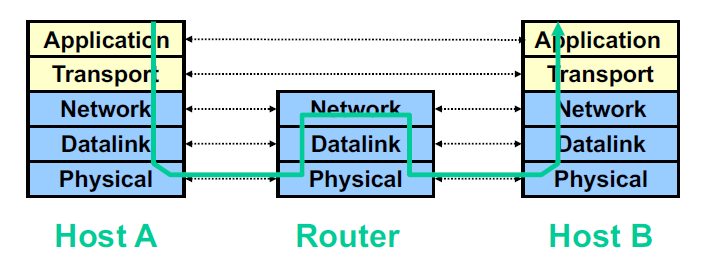